In [132]:
# Importing Libaries etc
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
# Loading the data and splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [134]:
# Getting the shape
x_train[0].shape

(28, 28)

In [135]:
# Outputting array
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [136]:
y_train[333]

8

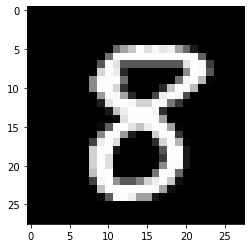

In [137]:
plt.imshow(x_train[333], cmap='Greys_r')

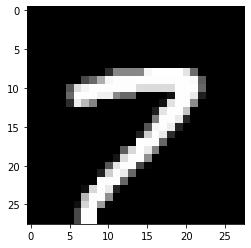

In [138]:
plt.imshow(x_train[123], cmap='Greys_r')

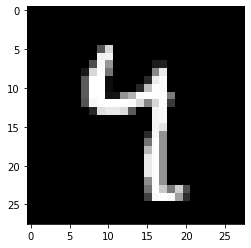

In [139]:
plt.imshow(x_train[576], cmap='Greys_r')

In [140]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [141]:
# Getting images and coverting them to vectors
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

# Keras with floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [142]:
# vector to binary
num_classes = 10 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [143]:
# Model with two hidden layers. Each connected and have a dropout of .2
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [144]:
model_1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_55 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________

In [145]:
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(lr=learning_rate),
                metrics=['accuracy']) 

In [146]:
# Fitting the data
batch_size = 128
epochs = 30
history = model_1.fit(x_train, y_train, batch_size=batch_size,
                     epochs=epochs, verbose=1,
                     validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 75us/step - loss: 0.4925 - accuracy: 0.8500 - val_loss: 0.1958 - val_accuracy: 0.9419
Epoch 2/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.2389 - accuracy: 0.9298 - val_loss: 0.1545 - val_accuracy: 0.9522
Epoch 3/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.1899 - accuracy: 0.9441 - val_loss: 0.1301 - val_accuracy: 0.9619
Epoch 4/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.1629 - accuracy: 0.9525 - val_loss: 0.1133 - val_accuracy: 0.9659
Epoch 5/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.1469 - accuracy: 0.9572 - val_loss: 0.1125 - val_accuracy: 0.9667
Epoch 6/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.1357 - accuracy: 0.9607 - val_loss: 0.1046 - val_accuracy: 0.9684
Epoch 7/30
60000/60000 [==============================] - 3s 58us/st

In [147]:
score = model_1.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027123487261814686
Test accuracy: 0.9927499890327454


In [148]:
# Model 2
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_33 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_34 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 10)                3010      
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


In [149]:
batch_size = 128
ephochs = 20
learning_rate = .001

model_2.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(lr=learning_rate),
                metrics=['accuracy'])

history = model_2.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(x_test, y_test))

score = model_2.evaluate(x_test, y_test, verbose=0)
print('')
print('Test loos:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 135us/step - loss: 0.3241 - accuracy: 0.9003 - val_loss: 0.1267 - val_accuracy: 0.9593
Epoch 2/30
60000/60000 [==============================] - 7s 121us/step - loss: 0.1483 - accuracy: 0.9552 - val_loss: 0.0970 - val_accuracy: 0.9719
Epoch 3/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.1193 - accuracy: 0.9649 - val_loss: 0.0828 - val_accuracy: 0.9762
Epoch 4/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.1010 - accuracy: 0.9711 - val_loss: 0.0846 - val_accuracy: 0.9757
Epoch 5/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.0929 - accuracy: 0.9728 - val_loss: 0.0817 - val_accuracy: 0.9778
Epoch 6/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.0836 - accuracy: 0.9770 - val_loss: 0.0774 - val_accuracy: 0.9796
Epoch 7/30
60000/60000 [==============================] - 7s 1

In [150]:
#How they compare
model_3 = Sequential()
model_3.add(Dense(400, activation='relu', input_shape=(784,)))
model_3.add(Dropout(0.1))
model_3.add(Dense(300, activation='relu', input_shape=(784,)))
model_3.add(Dropout(0.1))
model_3.add(Dense(10, activation='softmax'))

model_3.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_35 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_36 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 10)                3010      
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


In [151]:
batch_size = 128
ephochs = 35
learning_rate = .0001

model_2.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(lr= .0001),
                metrics=['accuracy'])

history = model_2.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(x_test, y_test))

score = model_2.evaluate(x_test, y_test, verbose=0)
print('')
print('Test loos:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.0283 - accuracy: 0.9923 - val_loss: 0.1133 - val_accuracy: 0.9841
Epoch 2/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0264 - accuracy: 0.9939 - val_loss: 0.1164 - val_accuracy: 0.9841
Epoch 3/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.0234 - accuracy: 0.9937 - val_loss: 0.1183 - val_accuracy: 0.9842
Epoch 4/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.1183 - val_accuracy: 0.9841
Epoch 5/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.0204 - accuracy: 0.9949 - val_loss: 0.1201 - val_accuracy: 0.9837
Epoch 6/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.0210 - accuracy: 0.9948 - val_loss: 0.1201 - val_accuracy: 0.9840
Epoch 7/30
60000/60000 [==============================] - 7s 1